<a href="https://colab.research.google.com/github/kahakashanashraf/machine-learning/blob/main/MLP_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.datasets import cifar100
# fashion_mnist, cifar10, cifar100
import matplotlib.pyplot as plt

In [ ]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [ ]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500, 6: 500, 7: 500, 8: 500, 9: 500, 10: 500, 11: 500, 12: 500, 13: 500, 14: 500, 15: 500, 16: 500, 17: 500, 18: 500, 19: 500, 20: 500, 21: 500, 22: 500, 23: 500, 24: 500, 25: 500, 26: 500, 27: 500, 28: 500, 29: 500, 30: 500, 31: 500, 32: 500, 33: 500, 34: 500, 35: 500, 36: 500, 37: 500, 38: 500, 39: 500, 40: 500, 41: 500, 42: 500, 43: 500, 44: 500, 45: 500, 46: 500, 47: 500, 48: 500, 49: 500, 50: 500, 51: 500, 52: 500, 53: 500, 54: 500, 55: 500, 56: 500, 57: 500, 58: 500, 59: 500, 60: 500, 61: 500, 62: 500, 63: 500, 64: 500, 65: 500, 66: 500, 67: 500, 68: 500, 69: 500, 70: 500, 71: 500, 72: 500, 73: 500, 74: 500, 75: 500, 76: 500, 77: 500, 78: 500, 79: 500, 80: 500, 81: 500, 82: 500, 83: 500, 84: 500, 85: 500, 86: 500, 87: 500, 88: 500, 89: 500, 90: 500, 91: 500, 92: 500, 93: 500, 94: 500, 95: 500, 96: 500, 97: 500, 98: 500, 99: 500}


In [ ]:
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

Test labels:  {0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100, 10: 100, 11: 100, 12: 100, 13: 100, 14: 100, 15: 100, 16: 100, 17: 100, 18: 100, 19: 100, 20: 100, 21: 100, 22: 100, 23: 100, 24: 100, 25: 100, 26: 100, 27: 100, 28: 100, 29: 100, 30: 100, 31: 100, 32: 100, 33: 100, 34: 100, 35: 100, 36: 100, 37: 100, 38: 100, 39: 100, 40: 100, 41: 100, 42: 100, 43: 100, 44: 100, 45: 100, 46: 100, 47: 100, 48: 100, 49: 100, 50: 100, 51: 100, 52: 100, 53: 100, 54: 100, 55: 100, 56: 100, 57: 100, 58: 100, 59: 100, 60: 100, 61: 100, 62: 100, 63: 100, 64: 100, 65: 100, 66: 100, 67: 100, 68: 100, 69: 100, 70: 100, 71: 100, 72: 100, 73: 100, 74: 100, 75: 100, 76: 100, 77: 100, 78: 100, 79: 100, 80: 100, 81: 100, 82: 100, 83: 100, 84: 100, 85: 100, 86: 100, 87: 100, 88: 100, 89: 100, 90: 100, 91: 100, 92: 100, 93: 100, 94: 100, 95: 100, 96: 100, 97: 100, 98: 100, 99: 100}


In [ ]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
x_train.shape[0]

50000

In [ ]:
indexes = np.random.randint(0, x_train.shape[0], size=20)
indexes

array([42170, 46747,  4204, 15704, 13037, 35009,  7649, 43409, 10090,
       10228,  2443,  5459, 48693,  3588, 39509, 15202, 40155, 18145,
       37151, 12033])

In [ ]:
# sample 20 cifar100 digits from train dataset
images = x_train[indexes]
labels = y_train[indexes]

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


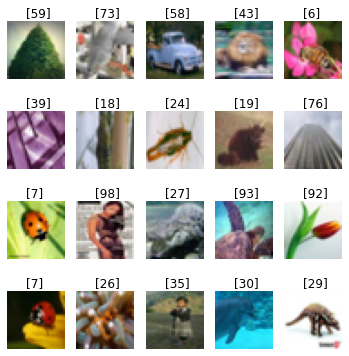

In [ ]:
plt.figure(figsize=(6,8))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.text(10, -3, labels[i], fontsize=12)
    plt.axis('off')

plt.show()
plt.close('all')

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical, plot_model

In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

100

In [ ]:
y_train


# 0 1 2 3 4 5 6 8 9
# 1 0 0 0 0 0 0 0 0

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [ ]:
60,000 28 28 3

In [ ]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)




In [ ]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size * x_train.shape[3]


In [ ]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [ ]:
x_train.shape, y_train.shape

((50000, 3072), (50000, 100))

In [ ]:
batch_size = 256
# 16 32 64 128 256
hidden_units = 1024

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 1024)              3146752   
                                                                 
 activation_27 (Activation)  (None, 1024)              0         
                                                                 
 dense_28 (Dense)            (None, 1024)              1049600   
                                                                 
 activation_28 (Activation)  (None, 1024)              0         
                                                                 
 dense_29 (Dense)            (None, 100)               102500    
                                                                 
 activation_29 (Activation)  (None, 100)               0         
                                                                 
Total params: 4,298,852
Trainable params: 4,298,852
No

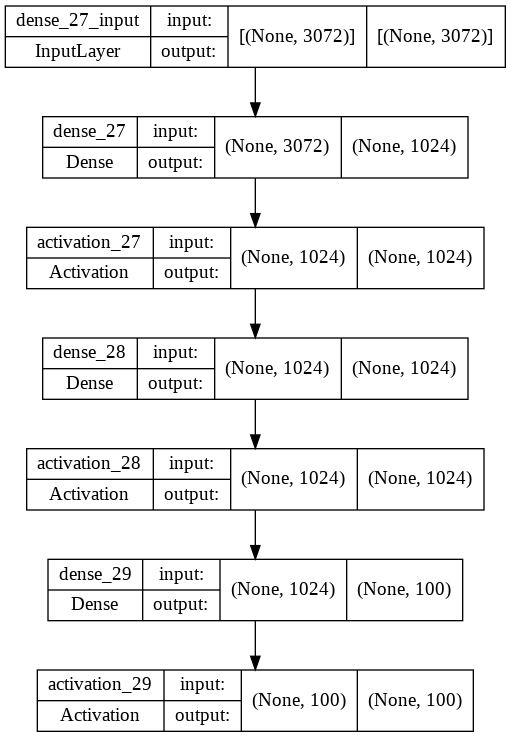

In [ ]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='mlp-cifar100.png', show_shapes=True)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=25, batch_size=batch_size)


Epoch 1/25
196/196 [==============================] - 2s 10ms/step - loss: 4.0633 - accuracy: 0.0848
Epoch 2/25
196/196 [==============================] - 2s 9ms/step - loss: 3.6347 - accuracy: 0.1510
Epoch 3/25
196/196 [==============================] - 2s 9ms/step - loss: 3.4482 - accuracy: 0.1818
Epoch 4/25
196/196 [==============================] - 2s 9ms/step - loss: 3.3234 - accuracy: 0.2037
Epoch 5/25
196/196 [==============================] - 2s 9ms/step - loss: 3.2164 - accuracy: 0.2236
Epoch 6/25
196/196 [==============================] - 2s 9ms/step - loss: 3.1180 - accuracy: 0.2410
Epoch 7/25
196/196 [==============================] - 2s 9ms/step - loss: 3.0311 - accuracy: 0.2585
Epoch 8/25
196/196 [==============================] - 2s 9ms/step - loss: 2.9493 - accuracy: 0.2718
Epoch 9/25
196/196 [==============================] - 2s 9ms/step - loss: 2.8669 - accuracy: 0.2875
Epoch 10/25
196/196 [==============================] - 2s 9ms/step - loss: 2.8026 - accuracy: 0.301

In [ ]:

# validate the model on test dataset to determine generalization
loss, acc = model.evaluate(x_test, y_test, batch_size = batch_size, verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 25.6%
